In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data sets

encounter3=pd.read_csv('encounter3.csv',sep='|')
patient3=pd.read_csv('patient3.csv',sep='|')
program_enrollment3=pd.read_csv('program_enrollment3.csv')

In [3]:
# Making copies of the data sets to avoid making changes in the original data sets

encounter=encounter3.copy()
patient=patient3.copy()
program_enrollment=program_enrollment3.copy()

In [4]:
patient.shape

(288921, 3)

# Program_enrollment Dataset cleaning

In [5]:
program_enrollment

,program_enrollment_id,patient_id,program,enrollment_date,completion_date,outcome
0,21,213014,HIV PROGRAM,12/2/2005,1/22/2016,\N
1,22,213369,TUBERCULOSIS PROGRAM,6/22/2006,12/22/2006,\N
2,23,212192,HIV PROGRAM,2/13/2006,1/3/2011,\N
3,27,214359,HIV PROGRAM,9/16/2005,7/3/2015,\N
4,29,212571,HIV PROGRAM,2/13/2006,11/24/2007,\N
...,...,...,...,...,...,...
149222,9991053,2218234,PDC Malnutrition,11/7/2019,\N,\N
149223,9991054,2132591,PDC Malnutrition,11/29/2017,\N,\N
149224,9991055,2179251,PDC Malnutrition,8/27/2020,\N,\N
149225,9991056,2201965,PDC Malnutrition,10/2/2020,\N,\N


In [7]:
program_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149227 entries, 0 to 149226
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   program_enrollment_id  149227 non-null  int64 
 1   patient_id             149227 non-null  int64 
 2   program                149227 non-null  object
 3   enrollment_date        149227 non-null  object
 4   completion_date        149227 non-null  object
 5   outcome                149227 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.8+ MB


In [8]:
date=pd.to_datetime('01/01/2001')
program_enrollment['enrollment_date']=program_enrollment['enrollment_date'].replace({'0999-12-26':date})
program_enrollment['enrollment_date']=program_enrollment['enrollment_date'].replace({'0999-12-31':date})

In [9]:
program_enrollment.rename(columns={'Unnamed: 5':'status'},inplace=True)

program_enrollment.rename(columns={r'end_date\N':'end_date'},inplace=True)

In [10]:
program_enrollment['enrollment_date']=pd.to_datetime(program_enrollment['enrollment_date'],errors='coerce')
program_enrollment['completion_date']=pd.to_datetime(program_enrollment['completion_date'],errors='coerce')

In [11]:
program_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149227 entries, 0 to 149226
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   program_enrollment_id  149227 non-null  int64         
 1   patient_id             149227 non-null  int64         
 2   program                149227 non-null  object        
 3   enrollment_date        149227 non-null  datetime64[ns]
 4   completion_date        73526 non-null   datetime64[ns]
 5   outcome                149227 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 6.8+ MB


In [13]:
date=pd.to_datetime('01/01/2025')
program_enrollment['completion_date']=program_enrollment['completion_date'].fillna(date)

In [14]:
program_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149227 entries, 0 to 149226
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   program_enrollment_id  149227 non-null  int64         
 1   patient_id             149227 non-null  int64         
 2   program                149227 non-null  object        
 3   enrollment_date        149227 non-null  datetime64[ns]
 4   completion_date        149227 non-null  datetime64[ns]
 5   outcome                149227 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 6.8+ MB


In [16]:
program_enrollment.head()

,program_enrollment_id,patient_id,program,enrollment_date,completion_date,outcome
0,21,213014,HIV PROGRAM,2005-12-02,2016-01-22,\N
1,22,213369,TUBERCULOSIS PROGRAM,2006-06-22,2006-12-22,\N
2,23,212192,HIV PROGRAM,2006-02-13,2011-01-03,\N
3,27,214359,HIV PROGRAM,2005-09-16,2015-07-03,\N
4,29,212571,HIV PROGRAM,2006-02-13,2007-11-24,\N


In [21]:
program_enrollment_2019_2022=program_enrollment.loc[(program_enrollment['enrollment_date']>='2019-01-01') &
                                                   (program_enrollment['enrollment_date']<='2022-06-30')]
program_enrollment_2019_2022

,program_enrollment_id,patient_id,program,enrollment_date,completion_date,outcome
5362,27069,218482,HIV PROGRAM,2021-03-26,2022-01-08,\N
6418,28639,220031,PEDIATRIC HIV PROGRAM,2019-01-18,2019-01-18,\N
22765,228342,225033,PMTCT Combined Clinic - Mother,2019-05-17,2016-10-05,\N
23004,228631,2100046,HIV PROGRAM,2020-12-07,2025-01-01,\N
23098,228747,277874,PMTCT Combined Clinic - Mother,2019-03-21,2017-08-03,\N
...,...,...,...,...,...,...
149221,9991052,2231042,PDC Malnutrition,2020-03-03,2025-01-01,\N
149222,9991053,2218234,PDC Malnutrition,2019-11-07,2025-01-01,\N
149224,9991055,2179251,PDC Malnutrition,2020-08-27,2025-01-01,\N
149225,9991056,2201965,PDC Malnutrition,2020-10-02,2025-01-01,\N


In [19]:
program_enrollment_2019_2022.enrollment_date.unique()

array(['2021-03-26T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-05-17T00:00:00.000000000', ...,
       '2022-08-18T00:00:00.000000000', '2022-08-23T00:00:00.000000000',
       '2022-01-16T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
program_enrollment_2019_2022.shape

(48517, 6)

In [22]:
program_enrollment_2019_2022.to_csv('program_enrollment1.csv')

In [90]:
df=pd.read_csv('count.csv')
df

,Quarter,Count of program,Year
0,Qtr 1,2879,2019
1,Qtr 1,3364,2020
2,Qtr 1,2906,2021
3,Qtr 1,2557,2022
4,Qtr 2,2832,2019
5,Qtr 2,3307,2020
6,Qtr 2,3898,2021
7,Qtr 2,2748,2022
8,Qtr 3,4020,2019
9,Qtr 3,3916,2020


In [97]:
df.sort_values(by='Year',ascending=True,inplace=True)

In [99]:
df.reset_index(drop=True)

,Quarter,Count of program,Year,cumulative_perc
0,Qtr 1,2879,2019,5.934003
1,Qtr 2,2832,2019,11.771132
2,Qtr 3,4020,2019,20.056887
3,Qtr 4,4378,2019,29.080528
4,Qtr 1,3364,2020,36.014181
5,Qtr 2,3307,2020,42.830348
6,Qtr 3,3916,2020,50.901746
7,Qtr 4,3588,2020,58.297092
8,Qtr 1,2906,2021,64.286745
9,Qtr 2,3898,2021,72.321042


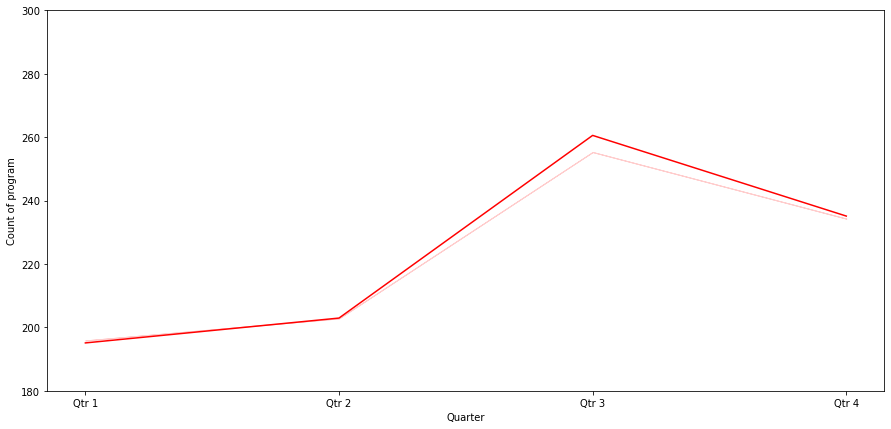

In [59]:
plt.figure(figsize=(15, 7))
sns.lineplot(
    data=df,
    x='Quarter',
    y='Count of program',
    ci=False,
    color='red',
    
    )

plt.ylim(180,300)
#plt.ylabel('enrollment_date_quarter')
#plt.xlabel('enrollment_date_year')
plt.show()

# Patient Dataset cleaning

In [12]:
patient=patient3.copy()

In [13]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288921 entries, 0 to 288920
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     288921 non-null  int64 
 1   health_center  288921 non-null  object
 2   birthdate      288921 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


In [14]:
patient[patient['health_center']=='\\N']

,patient_id,health_center,birthdate
0,2584851,\N,1987-01-01
4,2163124,\N,1960-01-01
5,2578755,\N,2014-12-08
7,2545763,\N,1992-08-02
26,2613630,\N,1941-10-22
...,...,...,...
288268,313381,\N,1952-01-01
288330,316554,\N,1977-01-01
288378,315976,\N,1945-01-01
288489,324654,\N,1972-01-01


In [15]:
patient['birthdate']=pd.to_datetime(patient['birthdate'],format='%Y-%m-%d',errors='coerce')


In [16]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288921 entries, 0 to 288920
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   patient_id     288921 non-null  int64         
 1   health_center  288921 non-null  object        
 2   birthdate      288630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.6+ MB


# Encounter Dataset cleaning

In [17]:
encounter=encounter3.copy()

In [18]:
encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823936 entries, 0 to 3823935
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   patient_id          int64 
 1   encounter_location  object
 2   encounter_date      object
 3   provider            object
 4   encounter_type      object
 5   form                object
 6   date_created        object
dtypes: int64(1), object(6)
memory usage: 204.2+ MB


In [19]:
#df1.to_csv('df1.csv')

In [20]:
#date=pd.to_datetime('01/01/2001')
#encounter['encounter_date']=encounter['encounter_date'].replace({'0999-12-26'>:date,'0207-06-21':date})

In [21]:
encounter.isnull().sum()

patient_id            0
encounter_location    0
encounter_date        0
provider              0
encounter_type        0
form                  0
date_created          0
dtype: int64

In [22]:
encounter['encounter_date']=pd.to_datetime(encounter['encounter_date'],format='%Y-%m-%d',errors='coerce')  
encounter['date_created']=pd.to_datetime(encounter['date_created'],format='%Y-%m-%d',errors='coerce') 

In [23]:
encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823936 entries, 0 to 3823935
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   patient_id          int64         
 1   encounter_location  object        
 2   encounter_date      datetime64[ns]
 3   provider            object        
 4   encounter_type      object        
 5   form                object        
 6   date_created        datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 204.2+ MB


In [24]:
encounter.isnull().sum()

patient_id               0
encounter_location       0
encounter_date        5047
provider                 0
encounter_type           0
form                     0
date_created             0
dtype: int64

In [25]:
date=pd.to_datetime('01/01/2001')
encounter['encounter_date']=encounter['encounter_date'].fillna(date)

In [26]:
encounter.isnull().sum()

patient_id            0
encounter_location    0
encounter_date        0
provider              0
encounter_type        0
form                  0
date_created          0
dtype: int64

In [27]:
encounter['days_taken_to_enter_the_data']=encounter['date_created']-encounter['encounter_date']

In [28]:
encounter['days_taken_to_enter_the_data']

0           2 days
1           1 days
2           1 days
3           2 days
4         205 days
            ...   
3823931     0 days
3823932    38 days
3823933     0 days
3823934     1 days
3823935    19 days
Name: days_taken_to_enter_the_data, Length: 3823936, dtype: timedelta64[ns]

In [29]:
encounter['days_taken_to_enter_the_data']= \
    (encounter['days_taken_to_enter_the_data']
     / np.timedelta64(1, 'D')).astype(float)

In [30]:
# positive days taken to enter the data 
encounter=encounter[encounter['days_taken_to_enter_the_data']>0]
encounter

,patient_id,encounter_location,encounter_date,provider,encounter_type,form,date_created,days_taken_to_enter_the_data
0,329622,Ntaruka,2020-03-16,\N,Mental Health visit,MH Diagnosis,2020-03-18,2.0
1,344971,Mucaca,2022-06-24,\N,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,2022-06-25,1.0
2,340567,Butaro Hospital,2021-03-24,\N,Non Clinical Oncology,Oncology - Schedule Appointment,2021-03-25,1.0
3,335191,Nyamugali,2021-07-29,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2021-07-31,2.0
4,317465,Nyamugali,2015-02-03,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2015-08-27,205.0
...,...,...,...,...,...,...,...,...
3823925,275033,Rutare Health Center,2014-03-11,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2014-03-12,1.0
3823926,215516,Mulindi Health Center,2012-10-09,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2013-05-13,216.0
3823932,212165,Rwinkwavu Health Center,2015-10-09,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2015-11-16,38.0
3823934,2221718,Ntaruka Health Center,2020-04-20,\N,Mental Health visit,MH Diagnosis,2020-04-21,1.0


In [31]:
# read the data
encounter_subset=encounter.copy()
patient_subset=patient.copy()
program_enrollment_subset=program_enrollment.copy()
clinic=pd.read_excel('Clinic.xlsx')
clinic2=pd.read_excel('Clinic1.xlsx')


In [32]:
encounter_subset

,patient_id,encounter_location,encounter_date,provider,encounter_type,form,date_created,days_taken_to_enter_the_data
0,329622,Ntaruka,2020-03-16,\N,Mental Health visit,MH Diagnosis,2020-03-18,2.0
1,344971,Mucaca,2022-06-24,\N,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,2022-06-25,1.0
2,340567,Butaro Hospital,2021-03-24,\N,Non Clinical Oncology,Oncology - Schedule Appointment,2021-03-25,1.0
3,335191,Nyamugali,2021-07-29,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2021-07-31,2.0
4,317465,Nyamugali,2015-02-03,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2015-08-27,205.0
...,...,...,...,...,...,...,...,...
3823925,275033,Rutare Health Center,2014-03-11,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2014-03-12,1.0
3823926,215516,Mulindi Health Center,2012-10-09,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2013-05-13,216.0
3823932,212165,Rwinkwavu Health Center,2015-10-09,\N,Adult HIV,Adult HIV Flowsheet - New Visit,2015-11-16,38.0
3823934,2221718,Ntaruka Health Center,2020-04-20,\N,Mental Health visit,MH Diagnosis,2020-04-21,1.0


In [33]:
encounter_subset1=encounter_subset.copy()
patient_subset1=patient_subset.copy()
program_enrollment_subset1=program_enrollment_subset.copy()
clinic1=clinic.copy()

In [34]:
clinic1

,encounter_type,program,clinic
0,Mental Health visit,Mental Health,mental health clinic
1,Exposed Infant,HIV PROGRAM,HIV Clinic
2,PEDIATRIC RETURN VISIT,HIV PROGRAM,HIV Clinic
3,ADULT INITIAL VISIT,HIV PROGRAM,HIV Clinic
4,ADULT RETURN VISIT,HIV PROGRAM,HIV Clinic
5,Pediatric HIV,HIV PROGRAM,HIV Clinic
6,Adult HIV,HIV PROGRAM,HIV Clinic
7,PEDIATRIC INITIAL VISIT,HIV PROGRAM,HIV Clinic
8,DIABETES VISIT,HIV PROGRAM,HIV Clinic
9,Exposed Infant,PMTCT Combined Clinic - Infant,HIV Clinic


## merging patient and program enrollment dataset

In [35]:
patient_program = pd.merge(patient_subset1, program_enrollment_subset1,
                           on=['patient_id'], how='left',
                           validate='one_to_many')
patient_program

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome
0,2584851,\N,1987-01-01,NaN,NaN,NaT,NaT,NaN
1,2128387,Musaza Health Center,1991-01-01,NaN,NaN,NaT,NaT,NaN
2,224995,Rwinkwavu Health Center,1989-01-01,213139.0,Diabetes Program,2008-11-14,2011-12-02,\N
3,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N
4,221242,Kirehe Health Center,1977-07-01,215369.0,PMTCT Pregnancy,2011-06-21,2011-09-01,\N
...,...,...,...,...,...,...,...,...
306908,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N
306909,339206,Nyamugali,2004-01-01,340212.0,HIV PROGRAM,2020-06-17,2025-01-01,\N
306910,326544,Butaro Hospital,1952-01-01,326543.0,Oncology,2018-09-10,2018-09-10,Not cancer - no biopsy
306911,318046,Butaro Hospital,1966-01-01,316921.0,Oncology,2015-06-15,2016-06-15,Completed program by data cleaning 2021


## Enrolled patient at the end of Q3

In [36]:
enrolled_patients_at_end_of_Q3 = patient_program[(patient_program['enrollment_date']
                                   < '2021-10-01')
                                   & patient_program['program'
                                   ].notnull()
                                   & (patient_program['completion_date'
                                   ] >= '2021-10-01') ]       
enrolled_patients_at_end_of_Q3

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome
3,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N
8,2230581,Musaza Health Center,2019-08-18,248274.0,PDC Program,2019-10-04,2025-01-01,\N
12,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N
27,2218577,Kabuye Health Center,2000-01-01,246022.0,MENTAL HEALTH,2019-08-23,2025-01-01,\N
50,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N
...,...,...,...,...,...,...,...,...
306900,326889,Butaro Hospital,1951-01-01,326889.0,Oncology,2018-10-11,2025-01-01,\N
306905,336114,Butaro Hospital,2017-07-08,336130.0,Oncology,2019-10-30,2025-01-01,\N
306907,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N
306908,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N


In [37]:
enrolled_patients_at_end_of_Q3['patient_id'].value_counts()

217781     5
256283     5
2164429    5
218082     5
2184879    5
          ..
235709     1
2149319    1
218355     1
2211478    1
339206     1
Name: patient_id, Length: 41740, dtype: int64

## Enrolled patients at the end of Q4

In [38]:
enrolled_patients_at_end_of_Q4 = patient_program[(patient_program['enrollment_date']
                                   <= '2021-12-31')
                                   & patient_program['program'
                                   ].notnull()
                                   & (patient_program['completion_date'
                                   ] > '2021-12-31') ]
enrolled_patients_at_end_of_Q4[enrolled_patients_at_end_of_Q4['patient_id']==319770] 

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome
268168,319770,Cyanika,2014-10-06,318887.0,PEDIATRIC HIV PROGRAM,2016-04-06,2025-01-01,\N


In [39]:
#encounter_subset1.set_index('ID')
encounter_subset2=encounter_subset1.copy()

encounter_subset2['index'] = encounter_subset2.index
encounter_subset2[encounter_subset2['patient_id']==315274]


,patient_id,encounter_location,encounter_date,provider,encounter_type,form,date_created,days_taken_to_enter_the_data,index
33151,315274,Cyanika,2015-09-23,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2015-11-20,58.0,33151
49546,315274,Cyanika,2016-11-17,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2017-02-23,98.0,49546
56271,315274,Cyanika,2020-08-15,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2020-08-19,4.0,56271
73426,315274,Cyanika,2018-11-08,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2019-01-08,61.0,73426
112227,315274,Cyanika,2019-08-05,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2019-08-07,2.0,112227
...,...,...,...,...,...,...,...,...,...
891444,315274,Cyanika,2015-07-14,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2015-07-27,13.0,891444
948045,315274,Cyanika,2018-08-09,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2019-01-08,152.0,948045
982397,315274,Cyanika,2016-04-27,\N,Pediatric HIV,Pedi HIV flowsheet New Lab,2017-07-27,456.0,982397
1000641,315274,Cyanika,2018-12-10,\N,Pediatric HIV,Pedi HIV flowsheet New Visit,2019-01-08,29.0,1000641


In [40]:
encounter_subset2 = encounter_subset2[[
    'patient_id',
    'index',
    'encounter_type',
    'form',
    'encounter_location',
    'encounter_date',
    'date_created',
    'days_taken_to_enter_the_data'
    ]]
encounter_subset2

,patient_id,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
0,329622,0,Mental Health visit,MH Diagnosis,Ntaruka,2020-03-16,2020-03-18,2.0
1,344971,1,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Mucaca,2022-06-24,2022-06-25,1.0
2,340567,2,Non Clinical Oncology,Oncology - Schedule Appointment,Butaro Hospital,2021-03-24,2021-03-25,1.0
3,335191,3,Adult HIV,Adult HIV Flowsheet - New Visit,Nyamugali,2021-07-29,2021-07-31,2.0
4,317465,4,Adult HIV,Adult HIV Flowsheet - New Visit,Nyamugali,2015-02-03,2015-08-27,205.0
...,...,...,...,...,...,...,...,...
3823925,275033,3823925,Adult HIV,Adult HIV Flowsheet - New Visit,Rutare Health Center,2014-03-11,2014-03-12,1.0
3823926,215516,3823926,Adult HIV,Adult HIV Flowsheet - New Visit,Mulindi Health Center,2012-10-09,2013-05-13,216.0
3823932,212165,3823932,Adult HIV,Adult HIV Flowsheet - New Visit,Rwinkwavu Health Center,2015-10-09,2015-11-16,38.0
3823934,2221718,3823934,Mental Health visit,MH Diagnosis,Ntaruka Health Center,2020-04-20,2020-04-21,1.0


## Encounters in the period October----December

In [41]:
encounters_in_Q4 = \
    encounter_subset2[(encounter_subset2['encounter_date'
        ] >= '2021-10-01')
        & (encounter_subset2['encounter_date'
        ] < '2022-01-01')]
encounters_in_Q4[encounters_in_Q4['patient_id']==319770]

,patient_id,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
137118,319770,137118,Pediatric HIV,Pedi HIV flowsheet New Visit,Cyanika,2021-10-27,2022-07-14,260.0


In [42]:
encounters_in_Q4_test = \
    encounter_subset2[(encounter_subset2['encounter_date'
        ] >= '2021-10-01')
        & (encounter_subset2['encounter_date'
        ] < '2022-01-01')]
#df5=encounter[(encounter['patient_id']==310470)&(encounter['encounter_date']>'2021-10-01')]
#pd.set_option('display.max_rows', df5.shape[0]+1)
#print(df5)

encounters_in_Q4_test[encounters_in_Q4_test['patient_id']==319770]
#encounters_in_Q4_test[(encounters_in_Q4_test['encounter_date']>'2021-10-01')&(encounters_in_Q4_test['patient_id']==336386)]

,patient_id,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
137118,319770,137118,Pediatric HIV,Pedi HIV flowsheet New Visit,Cyanika,2021-10-27,2022-07-14,260.0


## Encounters in the period July---September

In [43]:
encounter_in_Q3 = \
    encounter_subset2[(encounter_subset2['encounter_date'
        ] >= '2021-07-01')
        & (encounter_subset2['encounter_date'
        ] < '2021-10-01')]
encounter_in_Q3

,patient_id,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
3,335191,3,Adult HIV,Adult HIV Flowsheet - New Visit,Nyamugali,2021-07-29,2021-07-31,2.0
33,341333,33,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Gahunga,2021-08-11,2021-08-12,1.0
87,333034,87,Mental Health visit,MH Routine encounter - Pharmacotherapy,Rugarama,2021-07-26,2022-01-08,166.0
112,324365,112,HF HTN CKD,NCD HF/HTN/CKD EXAM LABORATORY TEST,Kinyababa,2021-08-02,2021-08-12,10.0
152,341824,152,Mental Health visit,MH Routine encounter - Pharmacotherapy,Gitare,2021-07-05,2021-07-12,7.0
...,...,...,...,...,...,...,...,...
3823509,2609694,3823509,HYPERTENSION VISIT,NCD HYPERTENSION: Enrollment form,Kabuye Health Center,2021-09-07,2022-01-18,133.0
3823563,2142459,3823563,ASTHMA VISIT,NCD Asthma: Rendez-Vous,Kirehe Health Center,2021-09-20,2021-09-22,2.0
3823586,2598011,3823586,HYPERTENSION VISIT,NCD HYPERTENSION: Enrollment form,Kirehe Health Center,2021-09-21,2021-09-22,1.0
3823783,2221515,3823783,DIABETES VISIT,NCD Diabetes: rendez-vous,Gahara Health Center,2021-07-06,2021-07-09,3.0


## Merging enrolled patients at the end of Q4 and encounters in Q4

In [44]:
patient_encounters_in_Q4 = pd.merge(enrolled_patients_at_end_of_Q4 , encounters_in_Q4,
                           on=['patient_id'], how='left',
                           validate='many_to_many')
patient_encounters_in_Q4[(patient_encounters_in_Q4['encounter_date']>'2021-10-01')&(patient_encounters_in_Q4['patient_id']==319770)]

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
39568,319770,Cyanika,2014-10-06,318887.0,PEDIATRIC HIV PROGRAM,2016-04-06,2025-01-01,\N,137118.0,Pediatric HIV,Pedi HIV flowsheet New Visit,Cyanika,2021-10-27,2022-07-14,260.0


In [45]:
patient_encounters_in_Q4[(patient_encounters_in_Q4['health_center']=='Cyanika')&(patient_encounters_in_Q4['program']=='PEDIATRIC HIV PROGRAM')]

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
39568,319770,Cyanika,2014-10-06,318887.0,PEDIATRIC HIV PROGRAM,2016-04-06,2025-01-01,\N,137118.0,Pediatric HIV,Pedi HIV flowsheet New Visit,Cyanika,2021-10-27,2022-07-14,260.0
57524,311938,Cyanika,2010-01-26,39866.0,PEDIATRIC HIV PROGRAM,2011-10-06,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
58622,342213,Cyanika,2020-06-30,343682.0,PEDIATRIC HIV PROGRAM,2021-02-08,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
60169,315274,Cyanika,2011-01-01,315725.0,PEDIATRIC HIV PROGRAM,2015-01-05,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
61060,320101,Cyanika,2010-01-17,323070.0,PEDIATRIC HIV PROGRAM,2016-05-19,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
64578,315258,Cyanika,2013-04-07,313774.0,PEDIATRIC HIV PROGRAM,2013-11-14,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
69702,316811,Cyanika,2012-12-08,315371.0,PEDIATRIC HIV PROGRAM,2014-09-02,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
70605,310710,Cyanika,2009-01-01,39066.0,PEDIATRIC HIV PROGRAM,2010-04-29,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN


## Merging enrolled patients at the end of Q3 and encounters in Q3

In [46]:
patient_encounters_in_Q3 = pd.merge(enrolled_patients_at_end_of_Q3, encounter_in_Q3,
                           on='patient_id', how='left',
                           validate='many_to_many')
patient_encounters_in_Q3 

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,3656207.0,Adult HIV,Adult HIV Flowsheet - New Visit,Kirehe Health Center,2021-09-10,2021-09-13,3.0
1,2230581,Musaza Health Center,2019-08-18,248274.0,PDC Program,2019-10-04,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,2218577,Kabuye Health Center,2000-01-01,246022.0,MENTAL HEALTH,2019-08-23,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N,1651806.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Cyarubare Health Center,2021-07-22,2021-07-25,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67494,336114,Butaro Hospital,2017-07-08,336130.0,Oncology,2019-10-30,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
67495,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
67496,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN
67497,339206,Nyamugali,2004-01-01,340212.0,HIV PROGRAM,2020-06-17,2025-01-01,\N,547949.0,Adult HIV,Adult HIV Flowsheet - New Visit,Nyamugali,2021-08-04,2021-08-09,5.0


In [47]:
patient_encounters_in_Q4_clinic = \
    pd.merge(patient_encounters_in_Q4, clinic, on=['program',
             'encounter_type'], how='left', validate='many_to_many')
patient_encounters_in_Q4_clinic

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,2230581,Musaza Health Center,2019-08-18,248274.0,PDC Program,2019-10-04,2025-01-01,\N,2851961.0,PDC Visit,PDC Visit Form,Musaza Health Center,2021-10-15,2021-10-22,7.0,NaN
2,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,2218577,Kabuye Health Center,2000-01-01,246022.0,MENTAL HEALTH,2019-08-23,2025-01-01,\N,3305123.0,Mental Health visit,MH Routine encounter - Pharmacotherapy,Kabuye Health Center,2021-10-30,2021-11-02,3.0,NaN
4,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N,3084213.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Cyarubare Health Center,2021-12-27,2022-01-27,31.0,Hypertension Clinic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72562,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N,882349.0,Drug Order Encounter,\N,\N,2021-12-01,2021-12-04,3.0,NaN
72563,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N,991612.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Ruhunde,2021-12-01,2021-12-04,3.0,Hypertension Clinic
72564,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N,512171.0,ASTHMA VISIT,NCD Asthma: Rendez-Vous,Rugarama,2021-12-07,2021-12-09,2.0,Chronic respiratory disease Clinic
72565,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N,545174.0,ASTHMA VISIT,NCD Asthma: Rendez-Vous,Rugarama,2021-10-12,2021-10-14,2.0,Chronic respiratory disease Clinic


In [48]:
patient_encounters_in_Q3_clinic = \
    pd.merge(patient_encounters_in_Q3, clinic, on=['program',
             'encounter_type'], how='left', validate='many_to_many')
patient_encounters_in_Q3_clinic

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,3656207.0,Adult HIV,Adult HIV Flowsheet - New Visit,Kirehe Health Center,2021-09-10,2021-09-13,3.0,HIV Clinic
1,2230581,Musaza Health Center,2019-08-18,248274.0,PDC Program,2019-10-04,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,2218577,Kabuye Health Center,2000-01-01,246022.0,MENTAL HEALTH,2019-08-23,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N,1651806.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Cyarubare Health Center,2021-07-22,2021-07-25,3.0,Hypertension Clinic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67494,336114,Butaro Hospital,2017-07-08,336130.0,Oncology,2019-10-30,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
67495,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
67496,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
67497,339206,Nyamugali,2004-01-01,340212.0,HIV PROGRAM,2020-06-17,2025-01-01,\N,547949.0,Adult HIV,Adult HIV Flowsheet - New Visit,Nyamugali,2021-08-04,2021-08-09,5.0,HIV Clinic


## Removing duplicates

In [49]:
patient_encounters_in_Q3_clinic= patient_encounters_in_Q3_clinic.drop_duplicates(['patient_id','program'], keep="last")
patient_encounters_in_Q3_clinic

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,3656207.0,Adult HIV,Adult HIV Flowsheet - New Visit,Kirehe Health Center,2021-09-10,2021-09-13,3.0,HIV Clinic
1,2230581,Musaza Health Center,2019-08-18,248274.0,PDC Program,2019-10-04,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,2218577,Kabuye Health Center,2000-01-01,246022.0,MENTAL HEALTH,2019-08-23,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N,1651806.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Cyarubare Health Center,2021-07-22,2021-07-25,3.0,Hypertension Clinic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67493,326889,Butaro Hospital,1951-01-01,326889.0,Oncology,2018-10-11,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
67494,336114,Butaro Hospital,2017-07-08,336130.0,Oncology,2019-10-30,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
67495,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
67496,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


## Active patients at the end of Q3

In [50]:
active_patient_at_end_of_Q3 = \
    patient_encounters_in_Q3_clinic[patient_encounters_in_Q3_clinic['encounter_type'
        ].notnull()]
active_patient_at_end_of_Q3

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,3656207.0,Adult HIV,Adult HIV Flowsheet - New Visit,Kirehe Health Center,2021-09-10,2021-09-13,3.0,HIV Clinic
4,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N,1651806.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Cyarubare Health Center,2021-07-22,2021-07-25,3.0,Hypertension Clinic
12,2533293,Rwinkwavu Hospital,1983-01-11,255723.0,Hypertension program,2021-01-06,2025-01-01,\N,3708178.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Rutare Health Center,2021-08-11,2021-08-12,1.0,Hypertension Clinic
14,2221498,Nyarubuye Health Center,1952-01-01,247015.0,MENTAL HEALTH,2018-12-31,2025-01-01,\N,3690443.0,Mental Health visit,MH Routine encounter - Pharmacotherapy,Nyarubuye Health Center,2021-08-27,2021-09-03,7.0,NaN
16,264035,Gashongora Health Center,1959-01-01,240920.0,Hypertension program,2018-08-22,2025-01-01,\N,3395057.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Gashongora Health Center,2021-08-04,2021-08-21,17.0,Hypertension Clinic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67477,322310,Ntaruka,1942-01-01,332994.0,Hypertension program,2019-03-19,2025-01-01,\N,1005829.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Ntaruka,2021-09-20,2021-09-21,1.0,Hypertension Clinic
67483,322310,Ntaruka,1942-01-01,335136.0,Chronic respiratory disease program,2019-03-19,2025-01-01,\N,1005829.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Ntaruka,2021-09-20,2021-09-21,1.0,NaN
67488,339177,Gitare,1925-01-01,340325.0,Hypertension program,2020-06-23,2025-01-01,\N,815374.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Gitare,2021-09-09,2021-09-16,7.0,Hypertension Clinic
67489,341413,Nyamugali,1976-01-01,342824.0,Mental Health,2020-10-21,2025-01-01,\N,503048.0,Mental Health visit,MH Routine encounter - Pharmacotherapy,Nyamugali,2021-09-23,2021-09-24,1.0,mental health clinic


In [51]:
df4=active_patient_at_end_of_Q3.loc[active_patient_at_end_of_Q3['health_center']=='Bukora Health Center','program'].value_counts()
df4

MENTAL HEALTH                          119
Hypertension program                   111
Chronic respiratory disease program     22
PDC Program                             13
Diabetes Program                        12
PDC Malnutrition                         5
Epilepsy program                         3
HIV PROGRAM                              1
PMTCT Combined Clinic - Infant           1
Name: program, dtype: int64

In [52]:
active_patient_at_end_of_Q3['patient_id'].duplicated().sum()

1196

## Removing duplicates

In [53]:
patient_encounters_in_Q4_clinic_without_duplicates = \
    patient_encounters_in_Q4_clinic.drop_duplicates(['patient_id',
        'program'], keep='last')
patient_encounters_in_Q4_clinic_without_duplicates

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,2230581,Musaza Health Center,2019-08-18,248274.0,PDC Program,2019-10-04,2025-01-01,\N,2851961.0,PDC Visit,PDC Visit Form,Musaza Health Center,2021-10-15,2021-10-22,7.0,NaN
2,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,2218577,Kabuye Health Center,2000-01-01,246022.0,MENTAL HEALTH,2019-08-23,2025-01-01,\N,3305123.0,Mental Health visit,MH Routine encounter - Pharmacotherapy,Kabuye Health Center,2021-10-30,2021-11-02,3.0,NaN
5,2143560,Cyarubare Health Center,1968-01-01,238388.0,Hypertension program,2018-01-25,2025-01-01,\N,3668136.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Cyarubare Health Center,2021-11-25,2021-11-26,1.0,Hypertension Clinic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72558,345723,Gahunga,1981-01-01,350334.0,Diabetes Program,2021-10-14,2025-01-01,\N,856319.0,DIABETES VISIT,NCD Diabetes: rendez-vous,Gahunga,2021-10-14,2021-10-26,12.0,Diabetes Clinic
72559,336114,Butaro Hospital,2017-07-08,336130.0,Oncology,2019-10-30,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
72563,336386,Ruhunde,1961-01-01,336554.0,Hypertension program,2019-11-14,2025-01-01,\N,991612.0,HF HTN CKD,NCD HF/HTN/CKD Clinic Visits,Ruhunde,2021-12-01,2021-12-04,3.0,Hypertension Clinic
72565,338990,Rugarama,1946-12-08,339957.0,Chronic respiratory disease program,2020-06-09,2025-01-01,\N,545174.0,ASTHMA VISIT,NCD Asthma: Rendez-Vous,Rugarama,2021-10-12,2021-10-14,2.0,Chronic respiratory disease Clinic


In [54]:
patient_encounters_in_Q4_clinic_without_duplicates['patient_id'].duplicated().sum()

2524

In [55]:
patient_without_encounters_in_Q4 = \
    patient_encounters_in_Q4_clinic_without_duplicates[patient_encounters_in_Q4_clinic_without_duplicates['encounter_type'
        ].isnull()]
patient_without_encounters_in_Q4

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,form,encounter_location,encounter_date,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,2166499,Musaza Health Center,2018-05-18,9990788.0,PDC Malnutrition,2018-07-13,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
17,2550875,Kabuye Health Center,2002-01-01,253777.0,MENTAL HEALTH,2020-12-07,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
18,2233695,Rwinkwavu Hospital,2002-07-02,251620.0,MENTAL HEALTH,2020-02-10,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
19,2533354,Cyarubare Health Center,1965-01-01,251413.0,HIV PROGRAM,2019-04-23,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72535,322427,Butaro Hospital,1972-01-01,321727.0,Oncology,2017-04-03,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
72542,341559,Butaro Hospital,1972-07-09,342981.0,Oncology,2020-12-01,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
72545,335377,Butaro Hospital,1975-01-01,335154.0,Oncology,2019-09-23,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
72546,326889,Butaro Hospital,1951-01-01,326889.0,Oncology,2018-10-11,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


## Newly lost to followup patients

In [56]:
newly_lost_to_follow_up = \
    pd.merge(active_patient_at_end_of_Q3,patient_without_encounters_in_Q4 , 
             on=['patient_id','health_center','program'], how='inner', validate='many_to_many')
newly_lost_to_follow_up

,patient_id,health_center,birthdate_x,program_enrollment_id_x,program,enrollment_date_x,completion_date_x,outcome_x,index_x,encounter_type_x,...,completion_date_y,outcome_y,index_y,encounter_type_y,form_y,encounter_location_y,encounter_date_y,date_created_y,days_taken_to_enter_the_data_y,clinic_y
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,3656207.0,Adult HIV,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,2109939,Musaza Health Center,1953-01-01,250228.0,Hypertension program,2017-04-12,2025-01-01,\N,1019901.0,HF HTN CKD,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,286357,Gahara Health Center,1988-01-01,224280.0,Chronic respiratory disease program,2013-11-13,2025-01-01,\N,3240153.0,ASTHMA VISIT,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,2149618,Nyamirama Health Center,1950-01-01,239569.0,Hypertension program,2018-04-13,2025-01-01,\N,3457979.0,HF HTN CKD,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,223826,Karama Health Center,1967-01-01,233920.0,HIV PROGRAM,2016-10-03,2025-01-01,\N,2518733.0,Adult HIV,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,344581,Nyamugali,2001-01-01,346239.0,Mental Health,2021-07-31,2025-01-01,\N,848650.0,Mental Health visit,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4841,343195,Butaro Health Center,1954-01-01,344718.0,Hypertension program,2021-04-21,2025-01-01,\N,697471.0,HF HTN CKD,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4842,332834,Nyamugali,1961-01-01,333502.0,Hypertension program,2018-12-07,2025-01-01,\N,717600.0,HF HTN CKD,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4843,313430,Butaro Hospital,1985-01-01,314053.0,Diabetes Program,2013-04-04,2025-01-01,\N,146726.0,DIABETES VISIT,...,2025-01-01,\N,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [57]:
newly_lost_to_follow_up.rename(columns={
    'birthdate_y': 'birthdate',
    'program_enrollment_id_y': 'program_enrollment_id',
    'enrollment_date_y': 'enrollment_date',
    'completion_date_y': 'completion_date',
    'outcome_y': 'outcome',
    'index_y': 'index',
    'encounter_type_y': 'encounter_type',
    'date_created_y': 'date_created',
    'days_taken_to_enter_the_data_y': 'days_taken_to_enter_the_data',
    'clinic_y': 'clinic',
    }, inplace=True)

In [58]:
newly_lost_to_follow_up=newly_lost_to_follow_up[['patient_id','health_center','birthdate','program_enrollment_id','program','enrollment_date','completion_date','outcome','index','encounter_type','date_created','days_taken_to_enter_the_data','clinic']]

In [59]:
newly_lost_to_follow_up

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,date_created,days_taken_to_enter_the_data,clinic
0,221242,Kirehe Health Center,1977-07-01,29726.0,HIV PROGRAM,2008-11-05,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
1,2109939,Musaza Health Center,1953-01-01,250228.0,Hypertension program,2017-04-12,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
2,286357,Gahara Health Center,1988-01-01,224280.0,Chronic respiratory disease program,2013-11-13,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
3,2149618,Nyamirama Health Center,1950-01-01,239569.0,Hypertension program,2018-04-13,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4,223826,Karama Health Center,1967-01-01,233920.0,HIV PROGRAM,2016-10-03,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,344581,Nyamugali,2001-01-01,346239.0,Mental Health,2021-07-31,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4841,343195,Butaro Health Center,1954-01-01,344718.0,Hypertension program,2021-04-21,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4842,332834,Nyamugali,1961-01-01,333502.0,Hypertension program,2018-12-07,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4843,313430,Butaro Hospital,1985-01-01,314053.0,Diabetes Program,2013-04-04,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN


In [60]:
df3=newly_lost_to_follow_up.loc[newly_lost_to_follow_up['health_center']=='Bukora Health Center','program'].value_counts()
df3

MENTAL HEALTH                          28
Hypertension program                   21
Diabetes Program                        7
Chronic respiratory disease program     5
PDC Program                             4
PDC Malnutrition                        2
Epilepsy program                        1
Name: program, dtype: int64

In [61]:
#newly_lost_to_follow_up.drop_duplicates(['patient_id','program_x'],keep='first',inplace=True)

In [62]:
newly_lost_to_follow_up[newly_lost_to_follow_up['patient_id'].duplicated()]

,patient_id,health_center,birthdate,program_enrollment_id,program,enrollment_date,completion_date,outcome,index,encounter_type,date_created,days_taken_to_enter_the_data,clinic
8,259590,Musaza Health Center,1975-01-01,250002.0,Chronic respiratory disease program,2019-08-29,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
13,2232479,Bukora Health Center,2020-01-14,9990194.0,PDC Malnutrition,2020-09-02,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
24,2142309,Mushikiri Health Center,2017-12-22,9990228.0,PDC Malnutrition,2018-06-05,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
43,2168297,Mushikiri Health Center,2018-06-22,9990313.0,PDC Malnutrition,2018-11-27,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
113,2173407,Musaza Health Center,2018-06-10,9990753.0,PDC Malnutrition,2018-09-07,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,347994,Cyanika,1979-01-23,349933.0,Diabetes Program,2020-09-15,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4663,316087,Butaro Hospital,1956-01-01,349101.0,Diabetes Program,2020-11-22,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4741,314883,Kinoni,1955-01-01,342529.0,Hypertension program,2020-11-09,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN
4810,321773,Butaro Health Center,1991-11-25,321553.0,PMTCT Combined Clinic - Mother,2021-01-26,2025-01-01,\N,NaN,NaN,NaT,NaN,NaN


In [63]:
active_patient_at_end_of_Q3['health_center'].value_counts()

Kirehe Health Center        992
Kabarondo Health Center     820
Nyamugali                   774
Gahara Health Center        714
Kirambo                     713
Nyamirama Health Center     671
Gitare                      642
Rwinkwavu Health Center     585
Kinoni                      569
Butaro Health Center        569
Butaro Hospital             561
Cyarubare Health Center     549
Gahunga                     527
Mucaca                      498
Ruhunde                     472
Cyanika                     463
Musaza Health Center        462
Rwantonde Health Center     461
Ndego Health Center         439
Kinyababa                   399
Mulindi Health Center       373
Ruramira Health Center      369
Karama Health Center        354
Rugarama                    350
Rusumo Health Center        302
Bungwe                      300
Ntaruka                     298
Bukora Health Center        287
Kirehe Hospital             276
Ruhombo                     267
Kabuye Health Center        264
Mushikir

In [64]:
newly_lost_to_follow_up['health_center'].value_counts()

Butaro Hospital             281
Ruramira Health Center      274
Nyamugali                   274
Musaza Health Center        261
Kirehe Health Center        252
Nyamirama Health Center     244
Kirehe Hospital             189
Kabarondo Health Center     173
Gahara Health Center        173
Rusumo Health Center        171
Rwinkwavu Health Center     164
Ndego Health Center         152
Mushikiri Health Center     131
\N                          121
Cyanika                     110
Butaro Health Center        108
Cyarubare Health Center     107
Rwantonde Health Center      99
Ntaruka Health Center        95
Nyabitare Health Center      94
Gatebe                       84
Gitare                       76
Rugarama                     75
Kigarama Health Center       74
Mulindi Health Center        74
Rwinkwavu Hospital           70
Rwerere                      68
Bukora Health Center         68
Kigina Health Center         65
Kinyababa                    61
Rutare Health Center         57
Kirambo 

In [65]:
percentage_of_lost_patient_per_health_center = \
   ( newly_lost_to_follow_up['health_center'].value_counts() \
    / active_patient_at_end_of_Q3['health_center'].value_counts())*100
round(percentage_of_lost_patient_per_health_center,2)

Bukora Health Center         23.69
Bungwe                        8.67
Butaro Health Center         18.98
Butaro Hospital              50.09
Cyanika                      23.76
Cyarubare Health Center      19.49
Gahara Health Center         24.23
Gahunga                       9.68
Gashongora Health Center     18.38
Gatebe                       43.30
Gitare                       11.84
Kabarondo Health Center      21.10
Kabuye Health Center         15.91
Kanombe Oncology Clinic      50.00
Karama Health Center          9.60
Kigarama Health Center       44.58
Kigina Health Center         70.65
Kinoni                        5.98
Kinyababa                    15.29
Kirambo                       7.43
Kirehe Health Center         25.40
Kirehe Hospital              68.48
Kivuye                       10.11
Mahama Health Center         43.68
Mucaca                        3.61
Muhima                      100.00
Mulindi Health Center        19.84
Musaza Health Center         56.49
Mushikiri Health Cen

In [66]:
active_patient_at_end_of_Q3.groupby(['health_center','program'])[['program']].count().head()

program
health_center        program                                     
Bukora Health Center Chronic respiratory disease program       22
                     Diabetes Program                          12
                     Epilepsy program                           3
                     HIV PROGRAM                                1
                     Hypertension program                     111

In [67]:
newly_lost_to_follow_up.groupby(['health_center', 'program'
                                   ])[['program']].count()

program
health_center        program                                     
Bukora Health Center Chronic respiratory disease program        5
                     Diabetes Program                           7
                     Epilepsy program                           1
                     Hypertension program                      21
                     MENTAL HEALTH                             28
...                                                           ...
\N                   HIV PROGRAM                                6
                     Hypertension program                      23
                     MENTAL HEALTH                             35
                     PDC Malnutrition                          15
                     PDC Program                               41

[344 rows x 1 columns]

In [68]:
percentage_of_newly_lost_patients_per_program = \
    newly_lost_to_follow_up.groupby(['health_center', 'program'
                                   ])[['program']].count() \
    / active_patient_at_end_of_Q3.groupby(['health_center',
        'program'])[['program']].count() * 100

round(percentage_of_newly_lost_patients_per_program, 2).head(60)

program
health_center           program                                     
Bukora Health Center    Chronic respiratory disease program    22.73
                        Diabetes Program                       58.33
                        Epilepsy program                       33.33
                        HIV PROGRAM                              NaN
                        Hypertension program                   18.92
                        MENTAL HEALTH                          23.53
                        PDC Malnutrition                       40.00
                        PDC Program                            30.77
                        PMTCT Combined Clinic - Infant           NaN
Bungwe                  Chronic respiratory disease program    13.73
                        Diabetes Program                         NaN
                        Hypertension program                    4.27
                        Mental Health                          14.63
                        Oncology                                 NaN
Butaro Health Center    Chronic respiratory disease program    27.27
                        Diabetes Program                         NaN
                        HEART FAILURE PROGRAM                 100.00
                        HIV PROGRAM                            25.00
                        Hypertension program                   25.32
                        Mental Health                           6.42
                        PMTCT Combined Clinic - Mother         33.33
                        PMTCT Pregnancy                          NaN
Butaro Hospital         Chronic respiratory disease program      NaN
                        Diabetes Program                       71.43
                        HEART FAILURE PROGRAM                  91.67
                        HIV PROGRAM                            45.00
                        Hypertension program                   54.55
                        Kidney disease                         50.00
                        Mental Health                          47.22
                        Oncology                               48.07
                        PEDIATRIC HIV PROGRAM                  66.67
                        PMTCT Combined Clinic - Mother         50.00
Cyanika                 Chronic respiratory disease program    10.53
                        Diabetes Program                        6.67
                        External HIV Program                     NaN
                        HEART FAILURE PROGRAM                 100.00
                        HIV PROGRAM                            30.26
                        Hypertension program                   26.41
                        Kidney disease                        100.00
                        Mental Health                          15.93
                        PEDIATRIC HIV PROGRAM                  50.00
                        PMTCT Combined Clinic - Mother         50.00
Cyarubare Health Center Chronic respiratory disease program    30.51
                        Diabetes Program                       46.15
                        Epilepsy program                         NaN
                        HEART FAILURE PROGRAM                    NaN
                        HIV PROGRAM                            36.61
                        Hypertension program                   11.32
                        MENTAL HEALTH                           6.14
                        PDC Malnutrition                      100.00
                        PDC Program                           100.00
                        PEDIATRIC HIV PROGRAM                  42.86
                        PMTCT Combined Clinic - Infant           NaN
                        PMTCT Combined Clinic - Mother         11.11
                        PMTCT Pregnancy                          NaN
Gahara Health Center    Chronic respiratory disease program    31.91
                        Diabetes Program                   

In [69]:
#percentage_of_newly_lost_patients_per_program.to_csv('percentage_of_newly_lost_patients_per_program.csv')

In [70]:
days_taken_to_enter_the_data_health_center=patient_encounters_in_Q4_clinic.groupby(['health_center','program'])[['days_taken_to_enter_the_data'
           ]].median().sort_values(by='days_taken_to_enter_the_data',ascending=False).reset_index()
days_taken_to_enter_the_data_health_center

,health_center,program,days_taken_to_enter_the_data
0,Cyanika,PEDIATRIC HIV PROGRAM,260.0
1,Kigina Health Center,Diabetes Program,206.0
2,Gashongora Health Center,ORACTA STUDY,199.0
3,Nyabitare Health Center,PMTCT Combined Clinic - Mother,198.0
4,Kigarama Health Center,PMTCT Combined Clinic - Mother,192.0
...,...,...,...
630,\N,PEDIATRIC HIV PROGRAM,NaN
631,\N,PMTCT Combined Clinic - Infant,NaN
632,\N,PMTCT Combined Clinic - Mother,NaN
633,\N,PMTCT Pregnancy,NaN


In [71]:
percentage_of_newly_lost_patients_per_program=pd.read_csv('percentage_of_newly_lost_patients_per_program.csv')
percentage_of_newly_lost_patients_per_program

,health_center,program,percentage of loss patient
0,Bukora Health Center,Chronic respiratory disease program,22.727273
1,Bukora Health Center,Diabetes Program,58.333333
2,Bukora Health Center,Epilepsy program,33.333333
3,Bukora Health Center,Hypertension program,18.918919
4,Bukora Health Center,MENTAL HEALTH,23.529412
...,...,...,...
341,\N,HIV PROGRAM,75.000000
342,\N,Hypertension program,56.097561
343,\N,MENTAL HEALTH,71.428571
344,\N,PDC Malnutrition,100.000000


In [72]:
#health_center_days_taken_to_enter_the_datapercentage_of_lost_patient_per_program = \
   # pd.merge(health_center_days_taken_to_enter_the_data,
            #how='left', validate='many_to_many')
#round(health_center_days_taken_to_enter_the_datapercentage_of_lost_patient_per_program,2)

In [73]:
# health_center_days_taken_to_enter_the_datapercentage_of_lost_patient_per_program[['health_center'
       # , 'program', 'days_taken_to_enter_the_data',
       # 'percentage of lost patients']]
#round(health_center_days_taken_to_enter_the_datapercentage_of_lost_patient_per_program,2)

In [74]:
days_taken_to_enter_the_data_per_health_center_program=patient_encounters_in_Q4_clinic.groupby(['health_center','program'
        ])[['days_taken_to_enter_the_data'
           ]].median()
days_taken_to_enter_the_data_per_health_center_program.head(50)

days_taken_to_enter_the_data
health_center        program                                                          
Bukora Health Center Chronic respiratory disease program                           5.0
                     Diabetes Program                                              1.0
                     Epilepsy program                                             50.0
                     HIV PROGRAM                                                   8.0
                     Hypertension program                                          5.0
                     MENTAL HEALTH                                                41.0
                     PDC Malnutrition                                            115.5
                     PDC Program                                                  99.0
                     PEDIATRIC HIV PROGRAM                                         NaN
                     PMTCT Combined Clinic - Infant                              107.0
                     PMTCT Combined Clinic - Mother                                NaN
                     PMTCT Pregnancy                                               NaN
                     TUBERCULOSIS PROGRAM                                          NaN
Bungwe               Chronic respiratory disease program                           3.0
                     Diabetes Program                                              2.0
                     HEART FAILURE PROGRAM                                         NaN
                     Hypertension program                                          2.0
                     Mental Health                                                 2.0
                     Oncology                                                      1.5
Butaro Health Center Chronic respiratory disease program                           2.0
                     Diabetes Program                                              1.0
                     HEART FAILURE PROGRAM                                         2.0
                     HIV PROGRAM                                                   4.0
                     Hypertension program                                          2.0
                     Mental Health                                                 3.0
                     Oncology                                                    190.0
                     PMTCT Combined Clinic - Mother                                4.0
                     PMTCT Pregnancy                                               4.0
Butaro Hospital      Chronic respiratory disease program                           5.0
                     Diabetes Program                                              3.0
                     Epilepsy program                                              NaN
                     HEART FAILURE PROGRAM                                        30.0
                     HIV PROGRAM                                                   3.0
                     Hypertension program                                          2.0
                     Kidney disease                                                3.0
                     Mental Health                                                 3.0
                     Oncology                                                      2.0
                     PEDIATRIC HIV PROGRAM                                        14.0
                     PMTCT Combined Clinic - Infant                                NaN
                     PMTCT Combined Clinic - Mother                                4.5
                     PMTCT Pregnancy                                               2.0
                     TUBERCULOSIS PROGRAM                                          2.0
Cyanika              Chronic respiratory disease program                         168.5
                     Diabetes Program                                            147.0
                     External HIV Program               

In [89]:
days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program = \
    pd.merge(days_taken_to_enter_the_data_per_health_center_program,
             percentage_of_newly_lost_patients_per_program, on=['health_center','program'],
             how='left', validate='many_to_many')
round(days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program,2).head(60)

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient
0,Bukora Health Center,Chronic respiratory disease program,5.0,22.73
1,Bukora Health Center,Diabetes Program,1.0,58.33
2,Bukora Health Center,Epilepsy program,50.0,33.33
3,Bukora Health Center,HIV PROGRAM,8.0,NaN
4,Bukora Health Center,Hypertension program,5.0,18.92
5,Bukora Health Center,MENTAL HEALTH,41.0,23.53
6,Bukora Health Center,PDC Malnutrition,115.5,40.00
7,Bukora Health Center,PDC Program,99.0,30.77
8,Bukora Health Center,PEDIATRIC HIV PROGRAM,NaN,NaN
9,Bukora Health Center,PMTCT Combined Clinic - Infant,107.0,NaN


In [76]:
days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program= \
    days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program[['health_center'
        , 'program', 'days_taken_to_enter_the_data',
        'percentage of loss patient']]
round(days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program,2)

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient
0,Bukora Health Center,Chronic respiratory disease program,5.0,22.73
1,Bukora Health Center,Diabetes Program,1.0,58.33
2,Bukora Health Center,Epilepsy program,50.0,33.33
3,Bukora Health Center,HIV PROGRAM,8.0,NaN
4,Bukora Health Center,Hypertension program,5.0,18.92
...,...,...,...,...
630,\N,PEDIATRIC HIV PROGRAM,NaN,NaN
631,\N,PMTCT Combined Clinic - Infant,NaN,NaN
632,\N,PMTCT Combined Clinic - Mother,NaN,NaN
633,\N,PMTCT Pregnancy,NaN,NaN


In [77]:
days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program.loc[days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program['program'
        ] == 'HEART FAILURE PROGRAM', 'days_taken_to_enter_the_data'
        ].median()

23.5

In [78]:
days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program
days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient
0,Bukora Health Center,Chronic respiratory disease program,5.0,22.727273
1,Bukora Health Center,Diabetes Program,1.0,58.333333
2,Bukora Health Center,Epilepsy program,50.0,33.333333
3,Bukora Health Center,HIV PROGRAM,8.0,NaN
4,Bukora Health Center,Hypertension program,5.0,18.918919
...,...,...,...,...
630,\N,PEDIATRIC HIV PROGRAM,NaN,NaN
631,\N,PMTCT Combined Clinic - Infant,NaN,NaN
632,\N,PMTCT Combined Clinic - Mother,NaN,NaN
633,\N,PMTCT Pregnancy,NaN,NaN


In [79]:
days_taken_to_enter_the_data_per_program_percentage_of_newly_lost_patient_per_program_clinic = \
    pd.merge(days_taken_to_enter_the_data_per_health_center_program_percentage_of_newly_lost_patient_per_program,
             clinic2, on='program',
             how='left', validate='many_to_many')
days_taken_to_enter_the_data_per_program_percentage_of_newly_lost_patient_per_program_clinic

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient,clinic
0,Bukora Health Center,Chronic respiratory disease program,5.0,22.727273,Chronic respiratory disease Clinic
1,Bukora Health Center,Diabetes Program,1.0,58.333333,Diabetes Clinic
2,Bukora Health Center,Epilepsy program,50.0,33.333333,NaN
3,Bukora Health Center,HIV PROGRAM,8.0,NaN,HIV Clinic
4,Bukora Health Center,Hypertension program,5.0,18.918919,Hypertension Clinic
...,...,...,...,...,...
630,\N,PEDIATRIC HIV PROGRAM,NaN,NaN,HIV Clinic
631,\N,PMTCT Combined Clinic - Infant,NaN,NaN,HIV Clinic
632,\N,PMTCT Combined Clinic - Mother,NaN,NaN,HIV Clinic
633,\N,PMTCT Pregnancy,NaN,NaN,HIV Clinic


<Figure size 720x504 with 0 Axes>

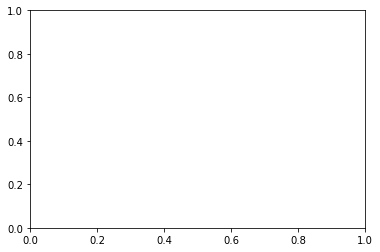

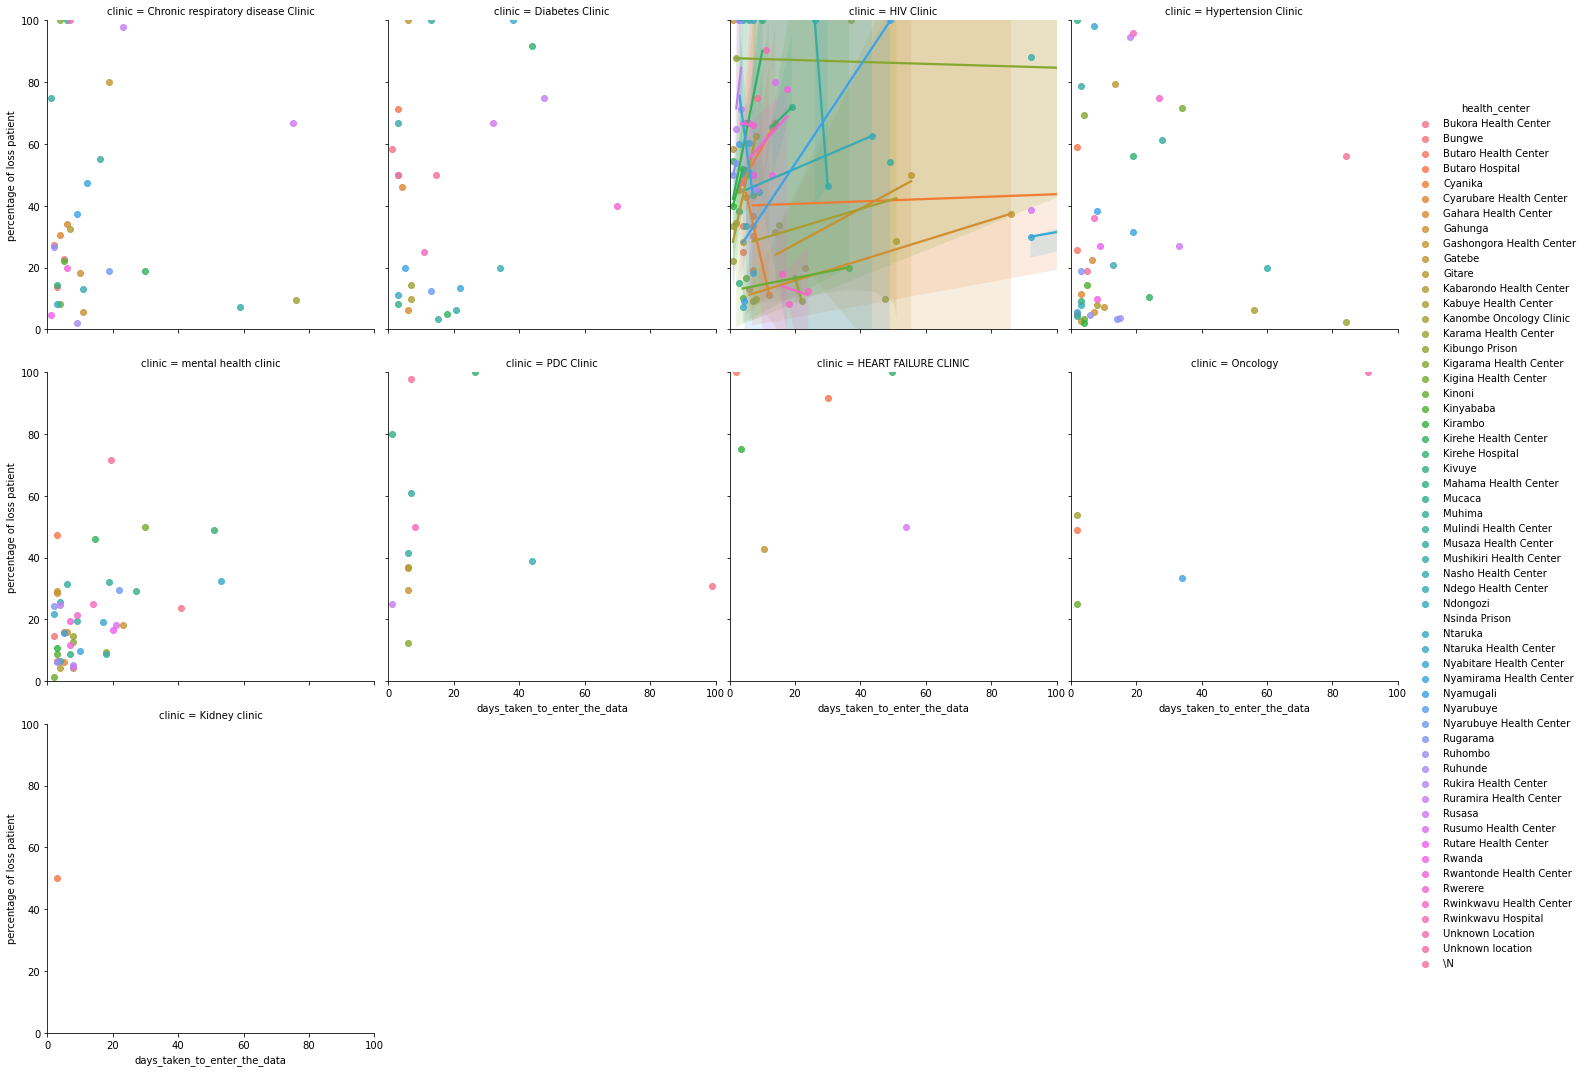

In [80]:
plt.figure(figsize=(10,7))
fig,ax=plt.subplots()
sns.lmplot(
    data=days_taken_to_enter_the_data_per_program_percentage_of_newly_lost_patient_per_program_clinic,
    x='days_taken_to_enter_the_data',
    y='percentage of loss patient',
    hue='health_center',
    col='clinic',
    col_wrap=4,
   
    )
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

<Figure size 720x504 with 0 Axes>

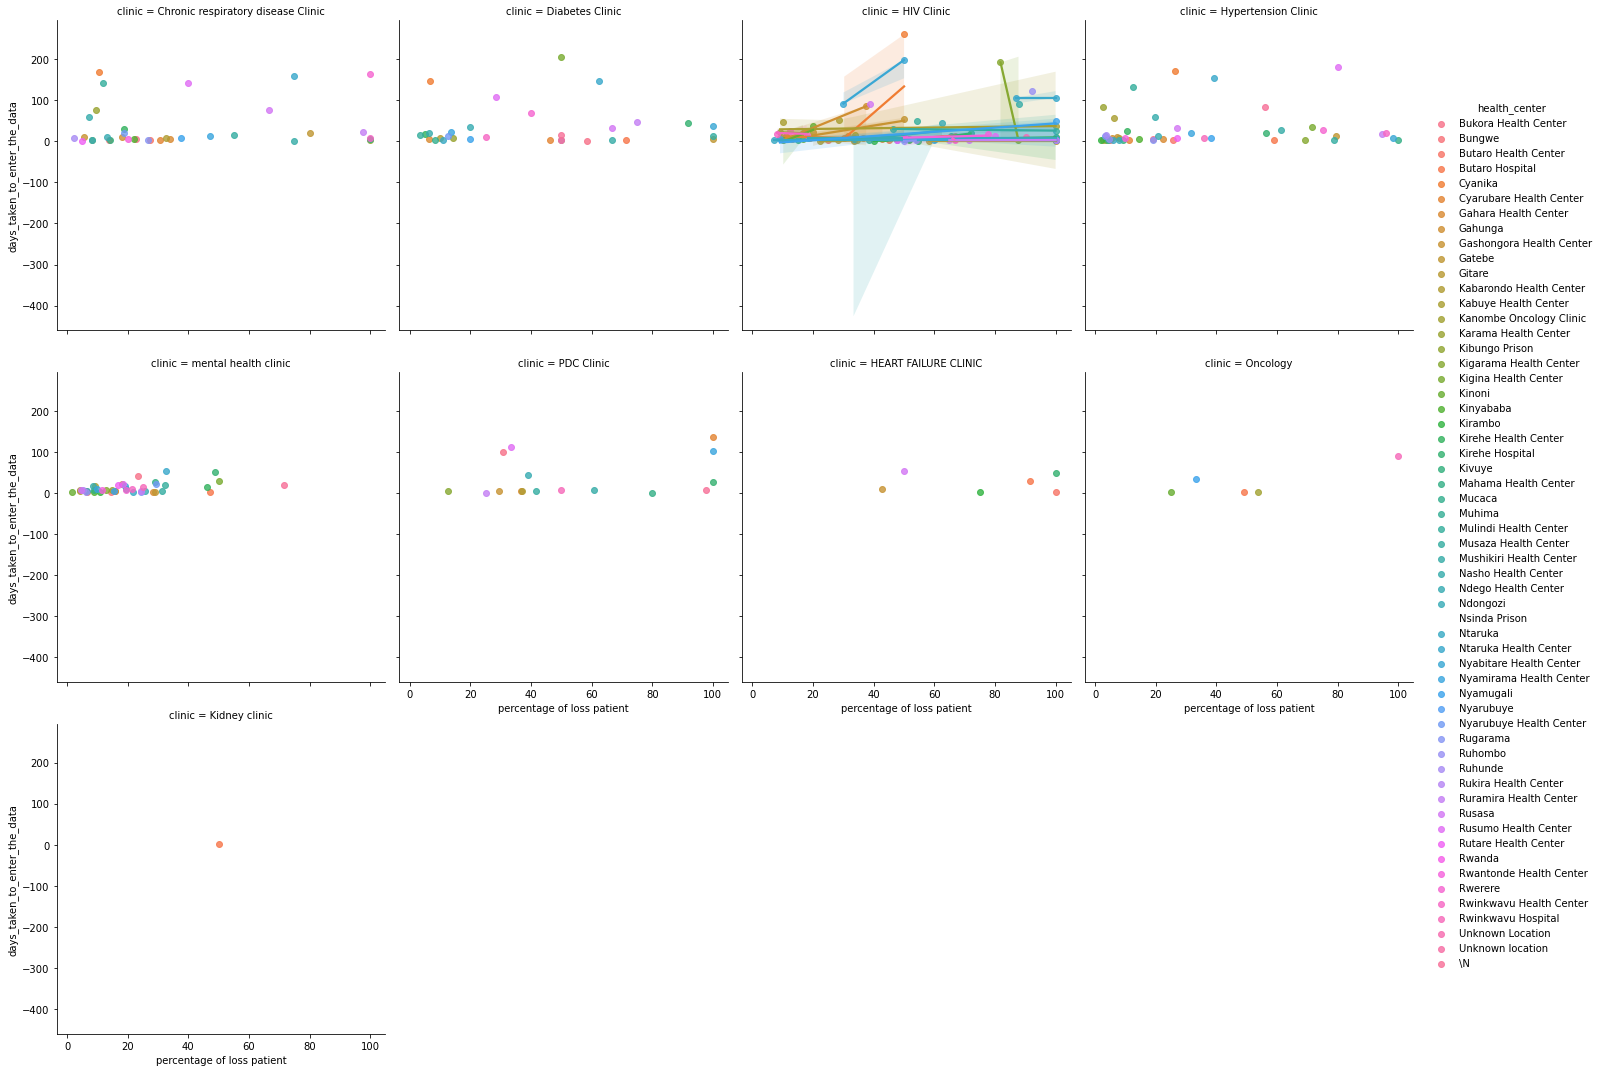

In [81]:
plt.figure(figsize=(10,7))
sns.lmplot(
    data=days_taken_to_enter_the_data_per_program_percentage_of_newly_lost_patient_per_program_clinic,
    x='percentage of loss patient',
    y='days_taken_to_enter_the_data',
    hue='health_center',
    col='clinic',
    col_wrap=4,
    )
plt.show()

# 80th percentile

In [82]:
eightyth_percentile=patient_encounters_in_Q4_clinic.groupby(['health_center','program'
        ])[['days_taken_to_enter_the_data'
           ]].quantile(0.8)
eightyth_percentile.head(50)

days_taken_to_enter_the_data
health_center        program                                                          
Bukora Health Center Chronic respiratory disease program                          22.0
                     Diabetes Program                                             77.8
                     Epilepsy program                                             51.2
                     HIV PROGRAM                                                  11.6
                     Hypertension program                                         14.0
                     MENTAL HEALTH                                                58.8
                     PDC Malnutrition                                            155.0
                     PDC Program                                                 138.0
                     PEDIATRIC HIV PROGRAM                                         NaN
                     PMTCT Combined Clinic - Infant                              167.0
                     PMTCT Combined Clinic - Mother                                NaN
                     PMTCT Pregnancy                                               NaN
                     TUBERCULOSIS PROGRAM                                          NaN
Bungwe               Chronic respiratory disease program                           4.0
                     Diabetes Program                                              2.0
                     HEART FAILURE PROGRAM                                         NaN
                     Hypertension program                                          3.0
                     Mental Health                                                 9.0
                     Oncology                                                      1.8
Butaro Health Center Chronic respiratory disease program                           7.0
                     Diabetes Program                                              7.0
                     HEART FAILURE PROGRAM                                         2.0
                     HIV PROGRAM                                                   6.0
                     Hypertension program                                          7.0
                     Mental Health                                                 6.0
                     Oncology                                                    190.0
                     PMTCT Combined Clinic - Mother                                5.6
                     PMTCT Pregnancy                                               5.0
Butaro Hospital      Chronic respiratory disease program                         158.0
                     Diabetes Program                                             12.0
                     Epilepsy program                                              NaN
                     HEART FAILURE PROGRAM                                        74.8
                     HIV PROGRAM                                                 175.6
                     Hypertension program                                         12.8
                     Kidney disease                                                3.0
                     Mental Health                                                 8.0
                     Oncology                                                      7.2
                     PEDIATRIC HIV PROGRAM                                        73.0
                     PMTCT Combined Clinic - Infant                                NaN
                     PMTCT Combined Clinic - Mother                                8.6
                     PMTCT Pregnancy                                               2.0
                     TUBERCULOSIS PROGRAM                                          2.0
Cyanika              Chronic respiratory disease program                         199.4
                     Diabetes Program                                            192.0
                     External HIV Program               

In [83]:
#eightyth_percentile.to_csv('eightyth_percentile.csv')

In [84]:
eightyth_percentile=pd.read_csv('eightyth_percentile.csv')
eightyth_percentile

,health_center,program,days_taken_to_enter_the_data
0,Bukora Health Center,Chronic respiratory disease program,22.0
1,Bukora Health Center,Diabetes Program,77.8
2,Bukora Health Center,Epilepsy program,51.2
3,Bukora Health Center,HIV PROGRAM,11.6
4,Bukora Health Center,Hypertension program,14.0
...,...,...,...
622,\N,PEDIATRIC HIV PROGRAM,NaN
623,\N,PMTCT Combined Clinic - Infant,NaN
624,\N,PMTCT Combined Clinic - Mother,NaN
625,\N,PMTCT Pregnancy,NaN


In [85]:
eightyth_percentile_percentage_of_newly_lost_patients_per_program = \
    pd.merge(eightyth_percentile,
             percentage_of_newly_lost_patients_per_program, on=['program','health_center'],
             how='left', validate='many_to_many')
round(eightyth_percentile_percentage_of_newly_lost_patients_per_program,2)

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient
0,Bukora Health Center,Chronic respiratory disease program,22.0,22.73
1,Bukora Health Center,Diabetes Program,77.8,58.33
2,Bukora Health Center,Epilepsy program,51.2,33.33
3,Bukora Health Center,HIV PROGRAM,11.6,NaN
4,Bukora Health Center,Hypertension program,14.0,18.92
...,...,...,...,...
622,\N,PEDIATRIC HIV PROGRAM,NaN,NaN
623,\N,PMTCT Combined Clinic - Infant,NaN,NaN
624,\N,PMTCT Combined Clinic - Mother,NaN,NaN
625,\N,PMTCT Pregnancy,NaN,NaN


In [86]:
eightyth_percentile_percentage_of_newly_lost_patients_per_program= \
    eightyth_percentile_percentage_of_newly_lost_patients_per_program[['health_center'
        , 'program', 'days_taken_to_enter_the_data',
        'percentage of loss patient']]
round(eightyth_percentile_percentage_of_newly_lost_patients_per_program.head(50),2)

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient
0,Bukora Health Center,Chronic respiratory disease program,22.0,22.73
1,Bukora Health Center,Diabetes Program,77.8,58.33
2,Bukora Health Center,Epilepsy program,51.2,33.33
3,Bukora Health Center,HIV PROGRAM,11.6,NaN
4,Bukora Health Center,Hypertension program,14.0,18.92
5,Bukora Health Center,MENTAL HEALTH,58.8,23.53
6,Bukora Health Center,PDC Malnutrition,155.0,40.00
7,Bukora Health Center,PDC Program,140.4,30.77
8,Bukora Health Center,PEDIATRIC HIV PROGRAM,NaN,NaN
9,Bukora Health Center,PMTCT Combined Clinic - Infant,167.0,NaN


In [87]:
eightyth_percentile_percentage_of_newly_lost_patients_per_program_clinic = \
    pd.merge(eightyth_percentile_percentage_of_newly_lost_patients_per_program,
             clinic2, on='program',
             how='left', validate='many_to_many')
round(eightyth_percentile_percentage_of_newly_lost_patients_per_program_clinic,2)

,health_center,program,days_taken_to_enter_the_data,percentage of loss patient,clinic
0,Bukora Health Center,Chronic respiratory disease program,22.0,22.73,Chronic respiratory disease Clinic
1,Bukora Health Center,Diabetes Program,77.8,58.33,Diabetes Clinic
2,Bukora Health Center,Epilepsy program,51.2,33.33,NaN
3,Bukora Health Center,HIV PROGRAM,11.6,NaN,HIV Clinic
4,Bukora Health Center,Hypertension program,14.0,18.92,Hypertension Clinic
...,...,...,...,...,...
622,\N,PEDIATRIC HIV PROGRAM,NaN,NaN,HIV Clinic
623,\N,PMTCT Combined Clinic - Infant,NaN,NaN,HIV Clinic
624,\N,PMTCT Combined Clinic - Mother,NaN,NaN,HIV Clinic
625,\N,PMTCT Pregnancy,NaN,NaN,HIV Clinic


<Figure size 720x504 with 0 Axes>

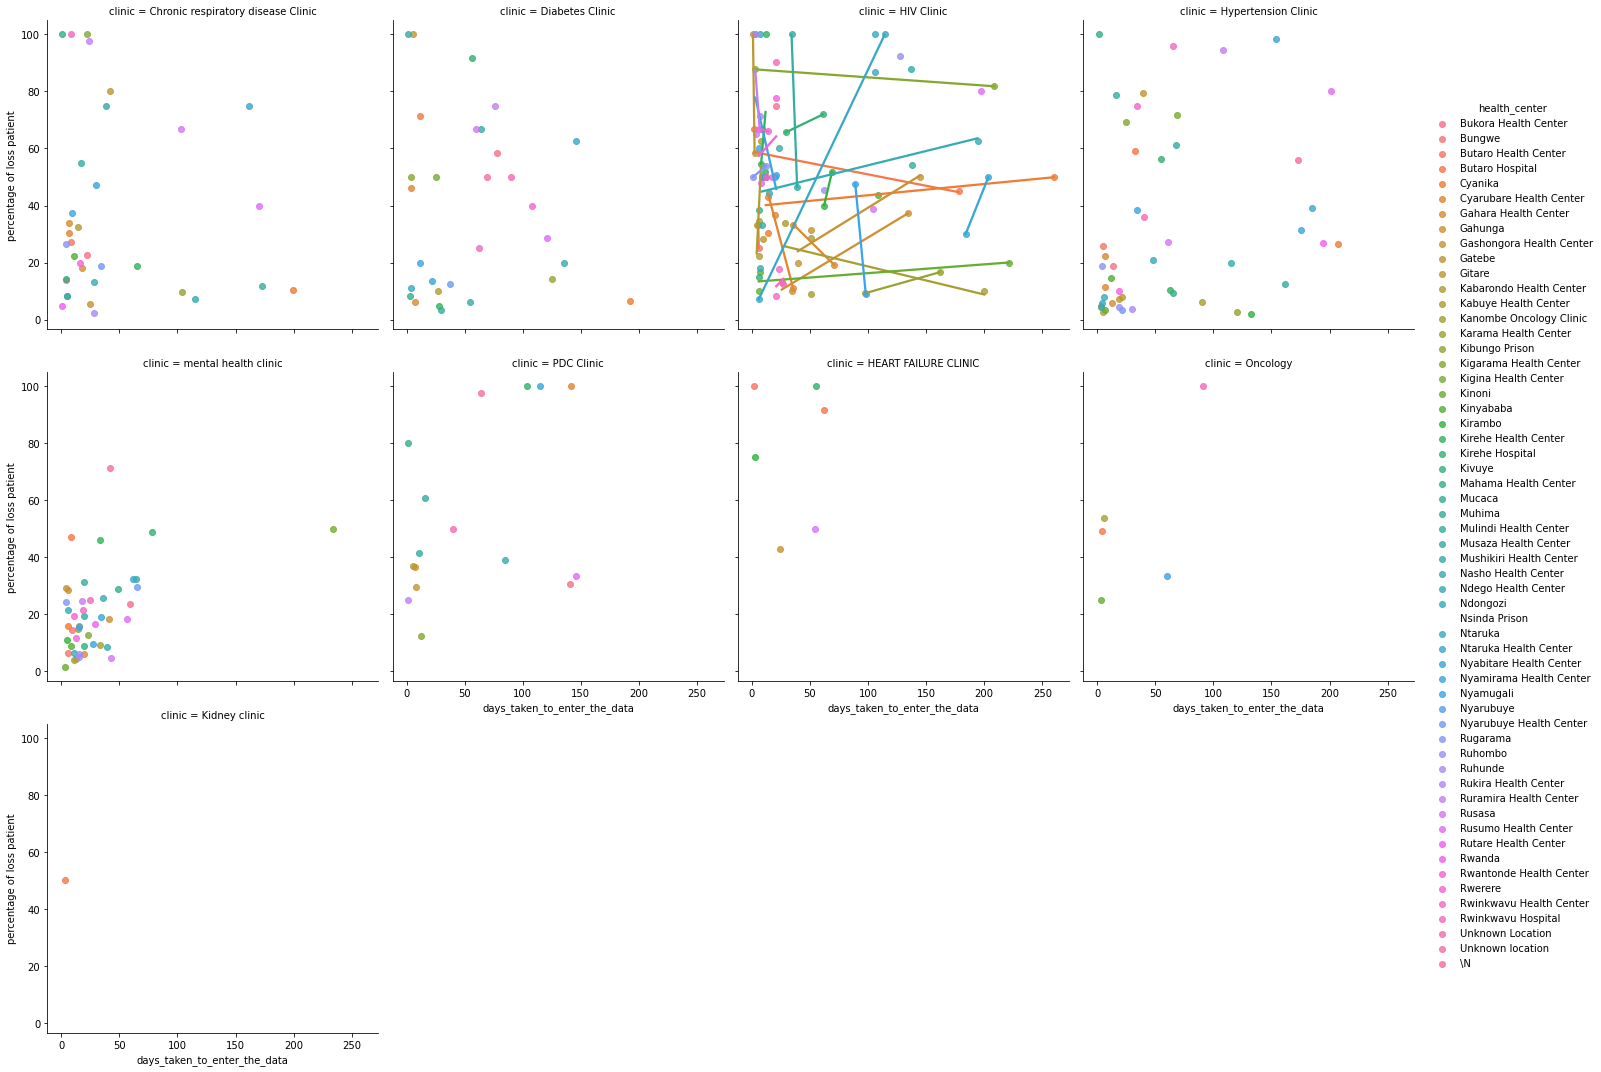

In [88]:
plt.figure(figsize=(10,7))
sns.lmplot(
    data=eightyth_percentile_percentage_of_newly_lost_patients_per_program_clinic,
    x='days_taken_to_enter_the_data',
    y='percentage of loss patient',
    hue='health_center',
    col='clinic',
    col_wrap=4,
    ci=False
    )
plt.show()